In [29]:
import tensorflow as tf

In [30]:
print(tensorflow.__version__)

2.8.2


In [31]:
import pandas as pd
import numpy as np

In [32]:
from tensorflow.keras.datasets import mnist

In [33]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Label:5


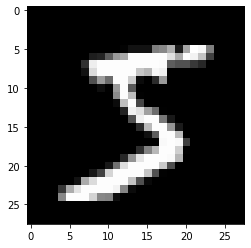

In [35]:
print("Label:{}".format(y_train[0]))
plt.imshow(X_train[0],cmap='gray')

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
#Reshape
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [38]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [39]:
#Normalize
X_train = X_train/255
X_test = X_test/255

In [40]:
X_test.max()

1.0

In [41]:
X_train.min()

0.0

In [42]:
#One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [43]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [44]:
from tensorflow.keras.models import Sequential
#Import CNN
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [45]:
#Creating a linear stack of layers
model = Sequential()
#1st Convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
#2nd Convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
#Flatten
model.add(Flatten())
#Neural Network Hidden Layer
model.add(Dense(128,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))

In [46]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
#Train the model
hist = model.fit(x=X_train,y=y_train,batch_size=32,epochs=3,validation_split=0.3)

Epoch 1/3
1313/1313 [==============================] - 92s 69ms/step - loss: 0.1361 - accuracy: 0.9590 - val_loss: 0.0746 - val_accuracy: 0.9758
Epoch 2/3
1313/1313 [==============================] - 91s 69ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 3/3
1313/1313 [==============================] - 91s 69ms/step - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.0506 - val_accuracy: 0.9850
